# IPL - First - Innings - Score - Prediction

## 1. Objective

### Task: We have to determine the live first innings Score / projected score based on input features such as (overs bowled till now, runs,  wickets, runs in previous  5 overs, wickets in previous  5 overs) and also based on their previous Stats / records/ performance throughout the IPL (i.e. 2008 - 2017)

### for eg: 

     Battingteam   Bowling_team   overs_bolwed_till_now  runs  wickets  runs_in_previous_5_overs wickets_in_previous_5_overs 
    Mumbai_Indians   Csk            13.2                 147      3             76                     1   
    
#### Total_output Based on this input and also previous record lets assume Mumbai_Indians Final score after 20 overs can be between (216- 222)

## 2.1 Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### 2.2 Load Datasets

In [2]:
df = pd.read_csv("ipl.csv")

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [4]:
print('total shape: ',df.shape)
print('total columns: ',df.columns)
print('*'*50)
print(df.info())

total shape:  (76014, 15)
total columns:  Index(['mid', 'date', 'venue', 'bat_team', 'bowl_team', 'batsman', 'bowler',
       'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5', 'striker',
       'non-striker', 'total'],
      dtype='object')
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11

### 2.3 Attribute information:
    1. date:           Actual date when the match was played live
    2. Venue:          Venue on which match was played 
    3: runs :          runs per ball
    4: runs_last_5:    Runs scored in last 5 overs in first innings
    5: wickets_last_5: Wickets taken in last 5 overs in first innings
    6: striker:        Person batting currently
    7: non-Striker:    Person standing at the non-striker end waiting for his turn
    8: Total:          Final Total score after the end of 20 overs scored by batting team in first innings

In [5]:
df.head(2)

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222


### 3. Data Cleaning 

In [6]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,18-04-2008,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [7]:
# Removing unwanted columns
columns_to_remove = ['mid','venue','batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [8]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


### 3.1 Lets check for total number of teams

In [9]:
df.bat_team.unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
df.bowl_team.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

#### Note: There are some of the team such as Pune Rising Supergiants , Gujrat Lions,Deccan chargers etc etc which are not playing currently, so we can remove them.

In [11]:
# Keeping only consistent teams
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [12]:
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [13]:
df.head(3)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222


### Very imp: Our main task from this project is to determine the live first innings Score / projected score ... but for that players need to play some overs in order to build the stats so that the model can learn through that

#### Case 1:
      if RCB played 10 overs and made 75 runs with 4 wickets so that due to this we can predict the projected score based on current runrate

####  Case 2:
         if RCB played 0 overs and made 0 runs with 0 wickets so based on this record we cant predict the projected score because there should be some balls to be faced by batting team in order to build the stats so that machine can learn through it



#### What we can do is that we can remove the first 5 overs from first innings so that we can see the data from 5th over and till that there will be some runs,wickets so that we can learn through it

In [14]:
# Removing the first 5 overs data in every match
df = df[df['overs']>=5.0]

In [15]:
df.head(3)    # we can se rows started from 5.1 to 20 overs

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222


### Consistent teams

In [16]:
print(df['bat_team'].unique())
print("*"*50)
print(df['bowl_team'].unique())

['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Kings XI Punjab' 'Royal Challengers Bangalore'
 'Delhi Daredevils' 'Sunrisers Hyderabad']
**************************************************
['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rajasthan Royals' 'Mumbai Indians' 'Chennai Super Kings'
 'Kolkata Knight Riders' 'Sunrisers Hyderabad']


In [17]:
df.head(2)

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,18-04-2008,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222


In [18]:
# Converting the column 'date' from string into datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y'))

In [19]:
df.info()  # date  converted to datetime object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40108 entries, 32 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            40108 non-null  datetime64[ns]
 1   bat_team        40108 non-null  object        
 2   bowl_team       40108 non-null  object        
 3   runs            40108 non-null  int64         
 4   wickets         40108 non-null  int64         
 5   overs           40108 non-null  float64       
 6   runs_last_5     40108 non-null  int64         
 7   wickets_last_5  40108 non-null  int64         
 8   total           40108 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 3.1+ MB


### 4. Data Preprocessing

In [20]:
# Converting categorical features using OneHotEncoding method
encoded_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [21]:
encoded_df.head(2)

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
encoded_df.columns

Index(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5',
       'total', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils',
       'bat_team_Kings XI Punjab', 'bat_team_Kolkata Knight Riders',
       'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
       'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
       'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils',
       'bowl_team_Kings XI Punjab', 'bowl_team_Kolkata Knight Riders',
       'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
       'bowl_team_Royal Challengers Bangalore',
       'bowl_team_Sunrisers Hyderabad'],
      dtype='object')

In [23]:
# Rearranging the columns
encoded_df = encoded_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

### 5. Train Test Split w.r.to datetime

In [24]:
X_train = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year <= 2016]
# i.e. Matches played from 2008 to 2016 data is used for training purpose

X_test = encoded_df.drop(labels='total', axis=1)[encoded_df['date'].dt.year >= 2017]
# i.e. Matches played after 2016 to 2017 data is used for testing purpose


In [25]:
y_train = encoded_df[encoded_df['date'].dt.year <= 2016]['total'].values
y_test = encoded_df[encoded_df['date'].dt.year >= 2017]['total'].values

In [26]:
# Removing the 'date' column
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [27]:
X_train.head(2)

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,59,1


In [28]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (37330, 21)
X_test: (2778, 21)
y_train: (37330,)
y_test: (2778,)


### 6. Load Machine learning Model

### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
lr_prediction=regressor.predict(X_test)

C:\Users\Nihar J\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

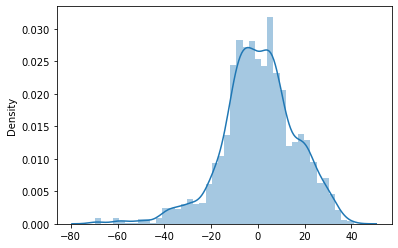

In [47]:
sns.distplot(y_test-lr_prediction)

In [48]:
from sklearn import metrics
import numpy as np
print('MeanAbsoluteError:', metrics.mean_absolute_error(y_test, lr_prediction))
print('MeanSquareError:', metrics.mean_squared_error(y_test, lr_prediction))
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, lr_prediction)))

MeanAbsoluteError: 12.118617546193295
MeanSquareError: 251.00792310417455
RootMeanSquareError: 15.843229566732111


In [62]:
lr_mse = metrics.mean_squared_error(y_test, lr_prediction)

### Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [32]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.24662e-20): result may not be accurate.
  overwrite_a=True).T
C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.47288e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.53988e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.43813e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.60409e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\Nihar J\anaconda3\lib\site-packages\sklea

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [33]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-328.4152792487924


In [34]:
prediction=ridge_regressor.predict(X_test)

C:\Users\Nihar J\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

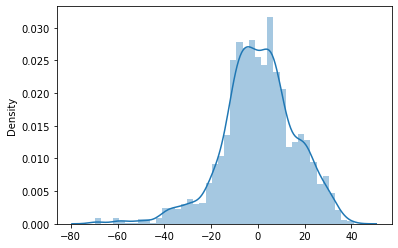

In [35]:
sns.distplot(y_test-prediction)

In [37]:
from sklearn import metrics
import numpy as np
print('MeanAbsoluteError:', metrics.mean_absolute_error(y_test, prediction))
print('MeanSquareError:', metrics.mean_squared_error(y_test, prediction))
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MeanAbsoluteError: 12.117294527005019
MeanSquareError: 251.03172964112724
RootMeanSquareError: 15.843980864704655


In [61]:
ridge_reg_mse =  metrics.mean_squared_error(y_test, prediction)

### Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [39]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4533346.686032622, tolerance: 2529.955696594561
  positive)
C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4468528.693573645, tolerance: 2547.0380710286604
  positive)
C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4647853.188535378, tolerance: 2667.8126904366463
  positive)
C:\Users\Nihar J\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations.

{'alpha': 1}
-320.82637898585256


In [40]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-320.82637898585256


In [42]:
lasso_prediction=lasso_regressor.predict(X_test)

C:\Users\Nihar J\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

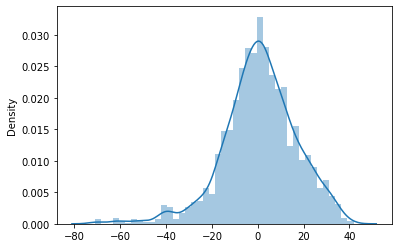

In [43]:
sns.distplot(y_test-lasso_prediction)

In [44]:
print('MeanAbsoluteError:', metrics.mean_absolute_error(y_test, lasso_prediction))
print('MeanSquareError:', metrics.mean_squared_error(y_test, lasso_prediction))
print('RootMeanSquareError:', np.sqrt(metrics.mean_squared_error(y_test, lasso_prediction)))

MeanAbsoluteError: 12.214053814850246
MeanSquareError: 262.3797366400714
RootMeanSquareError: 16.19813991296752


In [60]:
lasso_mse =  metrics.mean_squared_error(y_test, lasso_prediction)

### Comparison of MSE of Different Models 

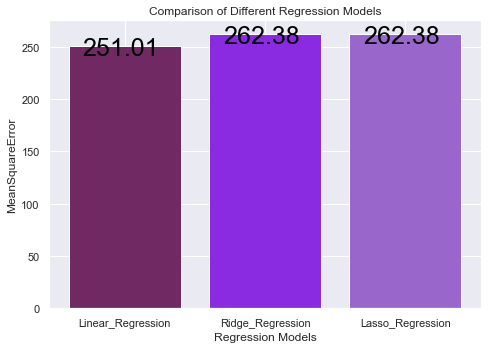

In [70]:
sns.set()
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Models = ["Linear_Regression","Ridge_Regression","Lasso_Regression"]
MeanSquareError=[lr_mse,ridge_reg_mse,lasso_mse]
ax.bar(Models,MeanSquareError,color=['#702963','#8a2be2','#9966cc']);
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()-8.9, str(round(i.get_height(),2)), fontsize=25, color='black')
plt.title('Comparison of Different Regression Models');
plt.ylabel('MeanSquareError');
plt.xlabel('Regression Models');

plt.show();